# Learning the Wave Equation

See the library `nn_1d_pde` for more on this problem.

In [47]:
import numpy as np
from matplotlib import pylab as plt
import detest
import sympy

In [77]:
PAR = [
    {},
    {'u0':lambda x: -x**3+x},
    {'u0':lambda x: sympy.sin(2.0*x*sympy.pi)},
    {'u0':lambda x: sympy.sin(4.0*x*sympy.pi)},
    {'u0':lambda x: sympy.sin(3.0*x*sympy.pi)+sympy.sin(4.0*x*sympy.pi)},
    {'u0':lambda x: sympy.sin(2.0*x*sympy.pi)+sympy.sin(4.0*x*sympy.pi)},
    {'u0':lambda x: sympy.sin(2.0*x*sympy.pi)+sympy.sin(8.0*x*sympy.pi)},
    {'u0':lambda x: 10.0*(x-x**2)},
    {'u0':lambda x: 15.0*(-x+x**2)},
    {'u0':lambda x: -x**3+x**2},
]

In [78]:
def make_wave_dataset(NX,NT, params={}):
    """Returns a numpy array with dimensions (N_time=NT, N_channel=2, N_space=NX)"""
    xs = np.linspace(0,1,NX)
    ts = np.linspace(0,5,NT)
    grid = np.meshgrid(xs,ts)
    orc = detest.oracles.WaveEquation1D(params)
    res = orc(np.c_[grid[0].ravel(),grid[1].ravel()])

    for k in res.keys():
        res[k] = res[k].reshape(NT,1,NX)
    return np.concatenate([res['u'],res['v']], axis=1)

In [89]:
data = make_wave_dataset(10,25,params=PAR[1])

[0.19350920659919693, -0.024188650824899606, 0.007167007651822101, -0.0030235813531124464, 0.0015480736527935708, -0.0008958759564777596, 0.0005641667830880341, -0.00037794766913905347, 0.00026544472784526056, -0.00019350920659919448, 0.00014538633102868976, -0.00011198449455971839, 8.807883777842609e-05, -7.052084788600294e-05, 5.733606121457203e-05, -4.724345864238052e-05, 3.9387178220883785e-05, -3.318059098065654e-05, 2.8212451756695488e-05, -2.418865082489838e-05]


In [95]:
NT,_,NX = data.shape
data.shape

(25, 2, 5)

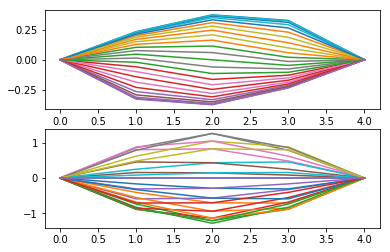

In [96]:
plt.subplot(2,1,1)
for i in range(NT):
    plt.plot(data[i,0,:])
plt.subplot(2,1,2)
for i in range(NT):
    plt.plot(data[i,1,:])

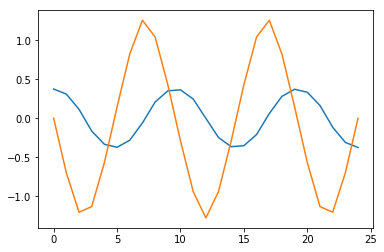

In [98]:
plt.plot(data[:,0,NX//2])
plt.plot(data[:,1,NX//2])

In [99]:
import torch